In [53]:
import xml.etree.cElementTree as ET
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Enable IPython to display matplotlib graphs

In [54]:
%matplotlib inline

Create empty data frame

In [55]:
df = pd.DataFrame(columns=('name', 'length', 'date', 'location', 'players'))

Setup constants

In [56]:
API_LINK = 'https://boardgamegeek.com/xmlapi2/plays'
USER = 'banzayats'
MINDATE='2016-01-01'
MAXDATE='2016-12-31'

Setup variables

In [57]:
page = 1
end = False

In [58]:
while not end:
    url = '{0}?username={1}&mindate={2}&maxdate={3}&page={4}'.format(API_LINK, USER, MINDATE, MAXDATE, page)
    tree = ET.ElementTree(file=urllib2.urlopen(url))
    plays = tree.getroot()
    if len(plays) < 100:
        end = True
    for i,play in enumerate(plays.findall(".//play[@quantity='1']")):
        length = play.attrib['length']
        date = play.attrib['date']
        location = play.attrib['location']
        name = play[0].attrib['name'].encode("utf-8")
        players = len(play.find('players').findall('player'))
        pointer = i + 100 * (page - 1)
        df.loc[pointer] = [name, length, date, location, players]
    page += 1

In [59]:
df.head()

,name,length,date,location,players
0,Castles of Mad King Ludwig,50,2016-12-18,Home,2.0
1,Eldritch Horror,160,2016-12-17,Home,3.0
2,7 Wonders Duel,40,2016-12-16,Home,2.0
3,7 Wonders Duel,40,2016-12-16,Home,2.0
4,7 Wonders Duel,35,2016-12-14,Home,2.0


In [60]:
df.shape

(332, 5)

In [61]:
df['length'] = df['length'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df.dtypes

name                object
length               int64
date        datetime64[ns]
location            object
players            float64
dtype: object

In [62]:
plays = df[['name','length','date']]
games_group = plays.groupby('name')
pd.DataFrame({'count' : plays.groupby( ['name'] ).size()}).reset_index()

,name,count
0,7 Wonders,6
1,7 Wonders Duel,9
2,Agricola: All Creatures Big and Small,8
3,Arkham Horror,6
4,BANG!,2
5,BattleLore (Second Edition),23
6,Between Two Cities,2
7,Bruges,22
8,Brügge: Die Haustiere,1
9,CV,6


In [63]:
games_length = games_group.sum()
games_length.sort_values('length', ascending=False)

,length
name,
BattleLore (Second Edition),2050
Eldritch Horror,1660
Bruges,1615
Runewars,1600
Race for the Galaxy,1390
Twilight Struggle,1095
Power Grid,1060
Arkham Horror,920
Small World,885


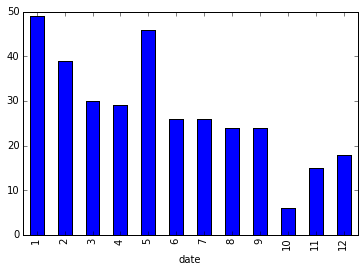

In [64]:
df['name'].groupby(df.date.dt.month).count().plot(kind="bar")

In [65]:
pd.DataFrame({'count' : df.groupby( ['location'] ).size()}).reset_index()

,location,count
0,Andrew's home,4
1,Around Bar,5
2,Dima's home,88
3,Engineer pub,22
4,Father's home,6
5,Galina's home,1
6,Galinas's home,2
7,Home,187
8,Irina's home,1
9,Lisopylka,3
